# Thesis Notes

## Literature Notes:
* > We found the number of people living in areas with no detectable light-ing to be highly correlated to reported electrification rates (Elvidge et al., 2011).
* **Question**: Has anyone investigated image series like this in economics before at all?

## Model Structure

* Use comparison groups with similar disaster likelihood.
* Other papers use the sum as a feature (mean can also be explored)

## Feature Engineering

The data is actually very large (multiple GB of image data in total for only the satellite images from the [NOAA](https://www.ngdc.noaa.gov/eog/dmsp/downloadV4composites.html#AVSLCFC).

### Missing Pixels

Some images will have missing pixels. These are represented by a 255 value according to the [data description](https://www.ngdc.noaa.gov/eog/gcv4_readme.txt). These should probably be replaced by the average of pixels in their area. 

P.s.: Probably, using __subimages__ as discussed below poses a solution to the problem as well. Just need to thing about that a bit more. (E.g. creating a lower dimensional representation of the image using local averages)

### Subimages

__(like Convolutional NN, a little)__

__But__: The number of observations (_n_) given naturally is actually not that big since only yearly data from 1992 onwards is available. But we do have a large number of features (_m_) given by the size of the images (~ 16kx43k). To use the data in a meaningful way it makes sense to engineer the features to give more information about the connection we want to study (natural disasters => luminosity).

We can take each of the large images and cut them up into smaller frames (e.g. 300x300px) which will give snapshots of the map. Then we can simply take out those snapshots that have more light (which probably means more information) by taking those with highest mean luminosity. These images are then all independent time series with _t_ (years) observations. That way, we are studying the impact of regressions on individual regions independently. 

For Barcelona that would look something like this:

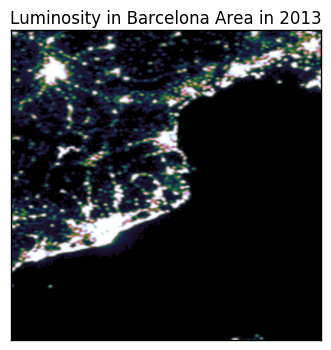

/Users/jpw/Development/ganter/ganv/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide
/Users/jpw/Development/ganter/ganv/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in greater


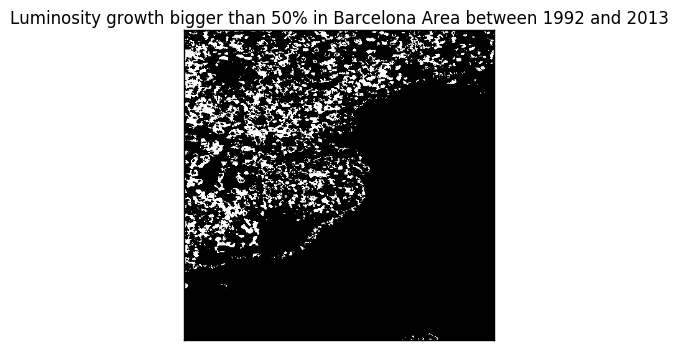

/Users/jpw/Development/ganter/ganv/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/jpw/Development/ganter/ganv/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in less


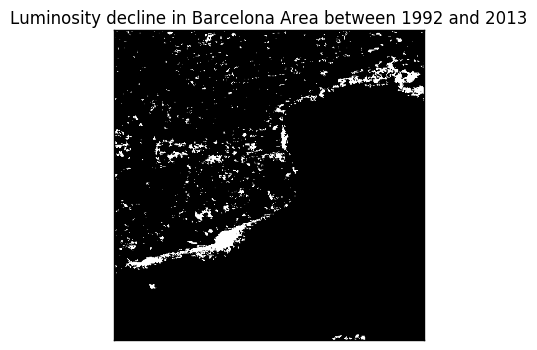

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tifffile import TiffFile

tif_paths = [
    'data/VIIRS/F101992.v4/F101992.v4b_web.stable_lights.avg_vis.tif',
    'data/VIIRS/F182013.v4/F182013.v4c_web.stable_lights.avg_vis.tif'
]
n = 500
m = 500

images = np.zeros((len(tif_paths),n,m))
                  
for i, p in enumerate(tif_paths):
    with TiffFile(p) as tif:
        images[i] = tif.asarray()[3700:4200,21700:22200]

        
plt.imshow(images[1], cmap='cubehelix')
plt.xticks([])
plt.yticks([])
plt.title('Luminosity in Barcelona Area in 2013')
plt.show()
plt.imshow((images[1] - images[0]) / images[0] > 1 , cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Luminosity growth bigger than 50% in Barcelona Area between 1992 and 2013')
plt.show()
plt.imshow((images[1] - images[0]) / images[0] < 0 , cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Luminosity decline in Barcelona Area between 1992 and 2013')
plt.show()